<a href="https://colab.research.google.com/github/nathannguyen0127/MANE4962-Machine-Learning-for-Engineering/blob/main/Homework04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***MANE 4962: Machine Learning for Engineering***

**Homework 4**

Nathan Nguyen : RIN 662029534

##Problem 1.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

###Problem 1a.

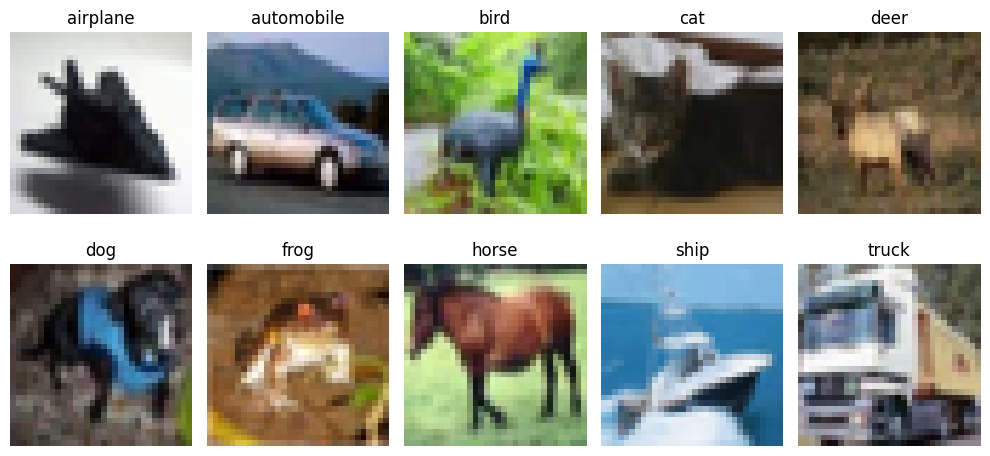

In [2]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

[unique_labels, idx] = np.unique(y_train, return_index=True)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[idx[i]], cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

###Problem 1b.

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import itertools
import numpy as np

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

def create_model(learning_rate=0.001, neurons=128):
  fc_model = keras.Sequential([
      Flatten(input_shape=(32, 32, 3)),
      Dense(neurons, activation='relu'),
      Dense(neurons, activation='relu'),
      Dense(10, activation='softmax')
  ])

  fc_model.compile(optimizer=Adam(learning_rate=learning_rate),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return fc_model

In [4]:
# Define hyperparameter grid
learning_rates = [0.001, 0.0001]
neurons_list = [128, 256]
batch_sizes = [32, 64]
epochs = 10

best_acc = 0
best_params = {}

for lr, neurons, batch_size in itertools.product(learning_rates, neurons_list, batch_sizes):
    print(f"Training with lr={lr}, neurons={neurons}, batch={batch_size}")
    model = create_model(learning_rate=lr, neurons=neurons)
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(x_val, y_val))
    val_acc = max(history.history['val_accuracy'])
    print(f"Validation Accuracy: {val_acc:.4f}")

    if val_acc > best_acc:
        best_acc = val_acc
        best_params = {'learning_rate': lr, 'neurons': neurons, 'batch_size': batch_size}
        best_history = history

print("Best parameters found:", best_params)
print(f"Best Validation Accuracy: {best_acc:.4f}")

print("Best parameters found:", best_params)
print(f"Best Validation Accuracy: {best_acc:.4f}")

Training with lr=0.001, neurons=128, batch=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.4655
Training with lr=0.001, neurons=128, batch=64
Validation Accuracy: 0.4575
Training with lr=0.001, neurons=256, batch=32
Validation Accuracy: 0.4613
Training with lr=0.001, neurons=256, batch=64
Validation Accuracy: 0.4838
Training with lr=0.0001, neurons=128, batch=32
Validation Accuracy: 0.4681
Training with lr=0.0001, neurons=128, batch=64
Validation Accuracy: 0.4667
Training with lr=0.0001, neurons=256, batch=32
Validation Accuracy: 0.4868
Training with lr=0.0001, neurons=256, batch=64
Validation Accuracy: 0.4769
Best parameters found: {'learning_rate': 0.0001, 'neurons': 256, 'batch_size': 32}
Best Validation Accuracy: 0.4868
Best parameters found: {'learning_rate': 0.0001, 'neurons': 256, 'batch_size': 32}
Best Validation Accuracy: 0.4868


###Problem 1c.

Text(0.5, 1.0, 'Training and Validation Loss')

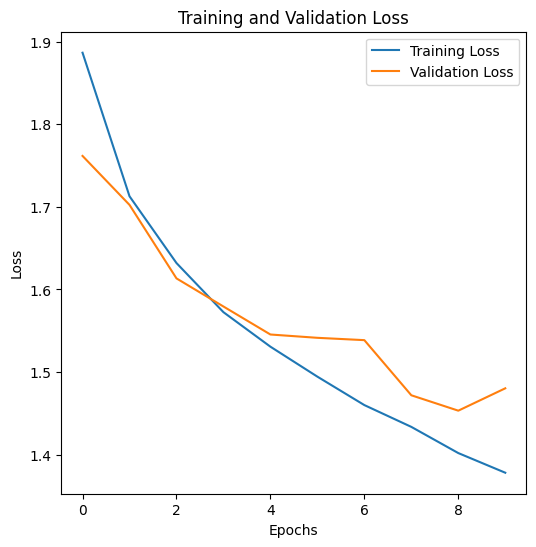

In [10]:
# Plot training and validation loss
plt.figure(figsize=(6, 6))
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

###Problem 1d.

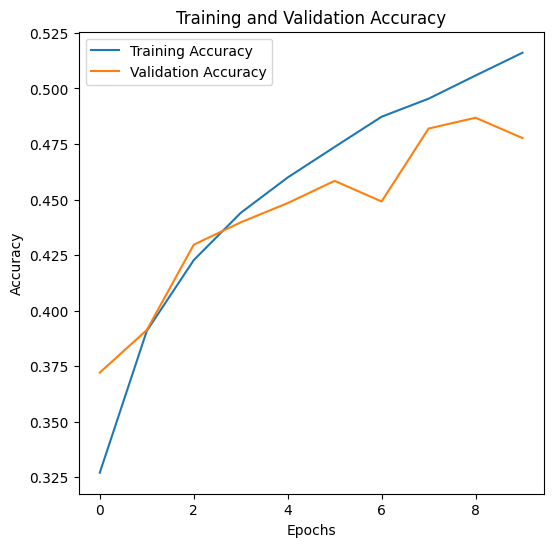

In [9]:
# Plot training and validation accuracy
plt.figure(figsize=(6, 6))
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

##Problem 2.

###Problem 2a.

In [11]:
!pip install ucimlrepo

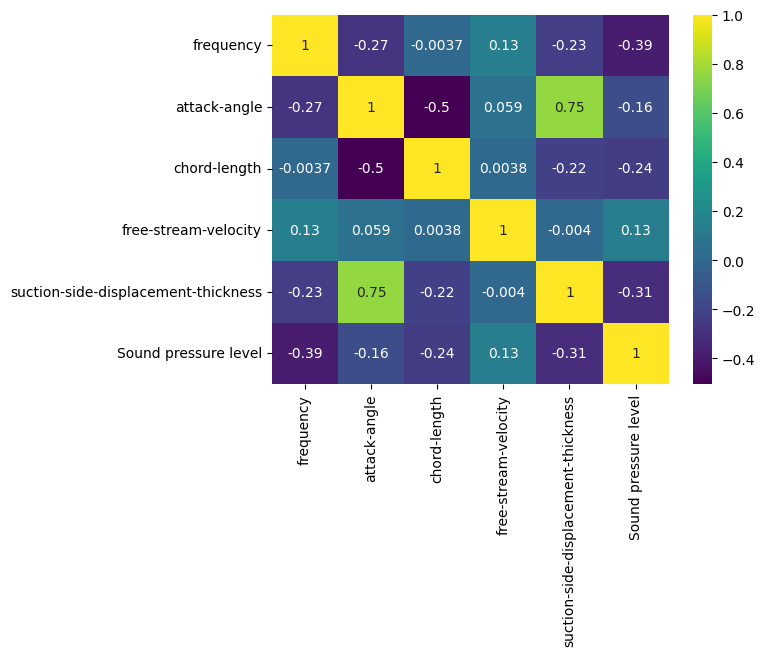

In [35]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

airfoil_self_noise = fetch_ucirepo(id=291)
X = airfoil_self_noise.data.features
y = airfoil_self_noise.data.targets

df = pd.DataFrame(X)
df['Sound pressure level'] = y

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.show()

###Problem 2b.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###Problem 2c.

In [34]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R-squared: 0.7675648927688599


.